In [88]:
import pandas as pd
from nltk import tokenize
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('mental_health_keywords.csv')
df.head()

,ngram,dataset,disorder,min_relative_rank,n,count
0,trichtillomania,reddit,general,0,1,1
1,attention deficit w/ hyperactivity,reddit,general,0,4,1
2,attention deflict distorder,reddit,general,0,3,1
3,attn deficit w hyperact,reddit,general,0,4,1
4,auspergers,reddit,general,0,1,1


<Figure size 10000x5000 with 0 Axes>

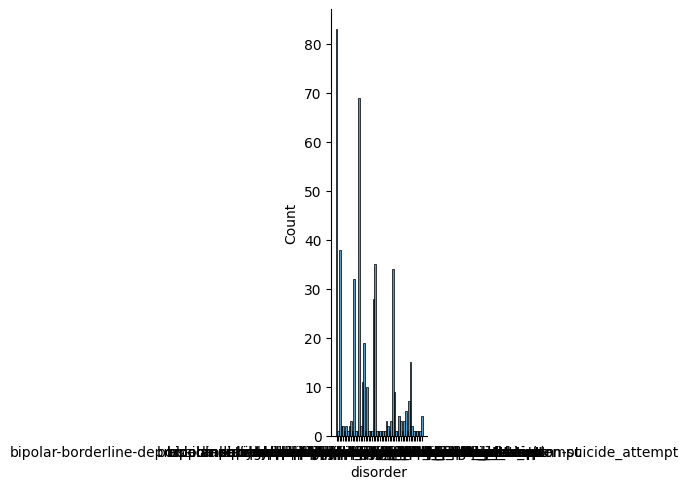

In [93]:
df_monogram = df[df.n <= 1]
plt.figure(figsize=(100,50))
sns.displot(df_monogram, x='disorder')
plt.show()
# df_monogram.head()
# df_monogram.info()

In [73]:
sample_text = """Nobody is probably going to respond to this post but I might not be alive much longer anyway. I'm a 21 year old virgin loser who is still in community college. I have been lonely my entire life, I don't have any siblings and my dad would always call me worthless and ugly. I'd have to sleep at friends house on the couch sometimes because he would come home too drunk and angry. Because of this I was really depressed in high school and didn't take the best care of myself, I was just the weird quiet kid. When it came time for graduation we had two lines to see who walks with who based on how tall we all were, and all the girls tried to push each other in front of each other so they didn't have to walk with me, I think about that every day. Bunch of other bad stuff happened too but I don't want this to turn into to much of a pathetic rant.

Anyway a full three years later after I moved out I met the most perfect girl I had ever met. She liked all the same things as me, was introverted like me, was easy to talk to, smart, funny, beautiful. I was so in love with her and I am pretty sure she liked me a little bit too, but my socially stunted ass had to be too scared to make a move a ruin it. I fucking hate myself so much. The chances of me meeting somebody like that again are zero. I made a promise with myself that I would do best to improve my life and put myself out there and if things didn't change by the time I was 22 I would kill myself. I am going to turn 22 in a few months and nothing has changed. 99% of the girls are meet are party girls I have nothing in common with who still think I am the weird kid. I don't want to kill myself because it would hurt my mom but don't think I can live like this anymore. I read some reddit and it seems like people think that people like me are whiny babies and their probably right. I know some people in other countries are fucking starving to death and being lonely isn't the worst thing that can happen to you. I'm such a pussy for letting this ruin my life which is probably why nobody wants to be with a worthless piece of shit like me. But I still stink about suicide everyday nonstop. I keep fantasizing that maybe if I kill myself Ill go somewhere where I am more lovable and like everybody else. I don't I just wish I wasn't born"""

total_words = tokenize.word_tokenize(sample_text)
print(total_words)

total_words_filter = list(filter(lambda x: x != ','
                                           and x != '.'
                                           and x != '!'
                                           and x != '?', total_words))
print(total_words_filter)

['Nobody', 'is', 'probably', 'going', 'to', 'respond', 'to', 'this', 'post', 'but', 'I', 'might', 'not', 'be', 'alive', 'much', 'longer', 'anyway', '.', 'I', "'m", 'a', '21', 'year', 'old', 'virgin', 'loser', 'who', 'is', 'still', 'in', 'community', 'college', '.', 'I', 'have', 'been', 'lonely', 'my', 'entire', 'life', ',', 'I', 'do', "n't", 'have', 'any', 'siblings', 'and', 'my', 'dad', 'would', 'always', 'call', 'me', 'worthless', 'and', 'ugly', '.', 'I', "'d", 'have', 'to', 'sleep', 'at', 'friends', 'house', 'on', 'the', 'couch', 'sometimes', 'because', 'he', 'would', 'come', 'home', 'too', 'drunk', 'and', 'angry', '.', 'Because', 'of', 'this', 'I', 'was', 'really', 'depressed', 'in', 'high', 'school', 'and', 'did', "n't", 'take', 'the', 'best', 'care', 'of', 'myself', ',', 'I', 'was', 'just', 'the', 'weird', 'quiet', 'kid', '.', 'When', 'it', 'came', 'time', 'for', 'graduation', 'we', 'had', 'two', 'lines', 'to', 'see', 'who', 'walks', 'with', 'who', 'based', 'on', 'how', 'tall', '

In [74]:
tf = {}
monograms = df_monogram['ngram'].unique()

for word in total_words_filter:
    if word in monograms:
        if word in tf:
            tf[word] += 1
        else:
            tf[word] = 1

print(tf)

{'worthless': 2, 'whiny': 1, 'suicide': 1}


In [77]:
def get_highest_frequency(dic_element, num):
    result = dict(sorted(dic_element.items(), key=itemgetter(1), reverse=True)[:num])
    return result

In [79]:
sorted_highest_frequency = get_highest_frequency(tf, 5)
print(sorted_highest_frequency)

{'worthless': 2, 'whiny': 1, 'suicide': 1}


In [67]:
keylist = list(sorted_highest_frequency.keys())
print(keylist)

['worthless', 'whiny', 'suicide']


In [68]:
disorder_list = []

for i in keylist:
   df_sorting = df_monogram.loc[df_monogram['ngram'] == i]
   disorder_list.append(df_sorting['disorder'].values[0])
print(disorder_list)

['borderline-depression-ptsd-suicidal_ideation', 'bipolar', 'borderline-depression-ptsd-suicidal_ideation-suicide_attempt']
